In [11]:
import nltk
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
nltk.download("stopwords")
nltk.download("punkt_tab")
nltk.download('wordnet')

from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\24191\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\24191\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\24191\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [12]:
pos_text = pd.read_csv("./pos.csv")
neg_text = pd.read_csv("./neg.csv")
print(pos_text)

                                                    Text
0      bromwell high is a cartoon comedy. it ran at t...
1      homelessness (or houselessness as george carli...
2      brilliant over-acting by lesley ann warren. be...
3      this is easily the most underrated film inn th...
4      this is not the typical mel brooks film. it wa...
...                                                  ...
12495  seeing as the vote average was pretty low, and...
12496  the plot had some wretched, unbelievable twist...
12497  i am amazed at how this movie(and most others ...
12498  a christmas together actually came before my t...
12499  working-class romantic drama from director mar...

[12500 rows x 1 columns]


In [13]:
stop_words= set(stopwords.words("English"))
stop_words.add("br")
stemmer = PorterStemmer()
pos_words_list = []
neg_words_list = []

for sentence in pos_text["Text"]:
    words = word_tokenize(sentence)
    words = [stemmer.stem(word) for word in words if word not in stop_words and word.isalpha()]
    pos_words_list.append(words)
for sentence in neg_text["Text"]:
    words = word_tokenize(sentence)
    words = [stemmer.stem(word) for word in words if word not in stop_words and word.isalpha()]
    neg_words_list.append(words)
all_words_list = pos_words_list + neg_words_list
all_words = nltk.FreqDist(w for words in all_words_list for w in words)
print(all_words)

<FreqDist with 48447 samples and 2862971 outcomes>


             word   freq
0            movi  50022
1            film  46628
2             one  26816
3            like  22248
4            time  15226
...           ...    ...
48442   roemenian      1
48443    serafian      1
48444      elvidg      1
48445    chautard      1
48446  mwuhahahaa      1

[48447 rows x 2 columns]


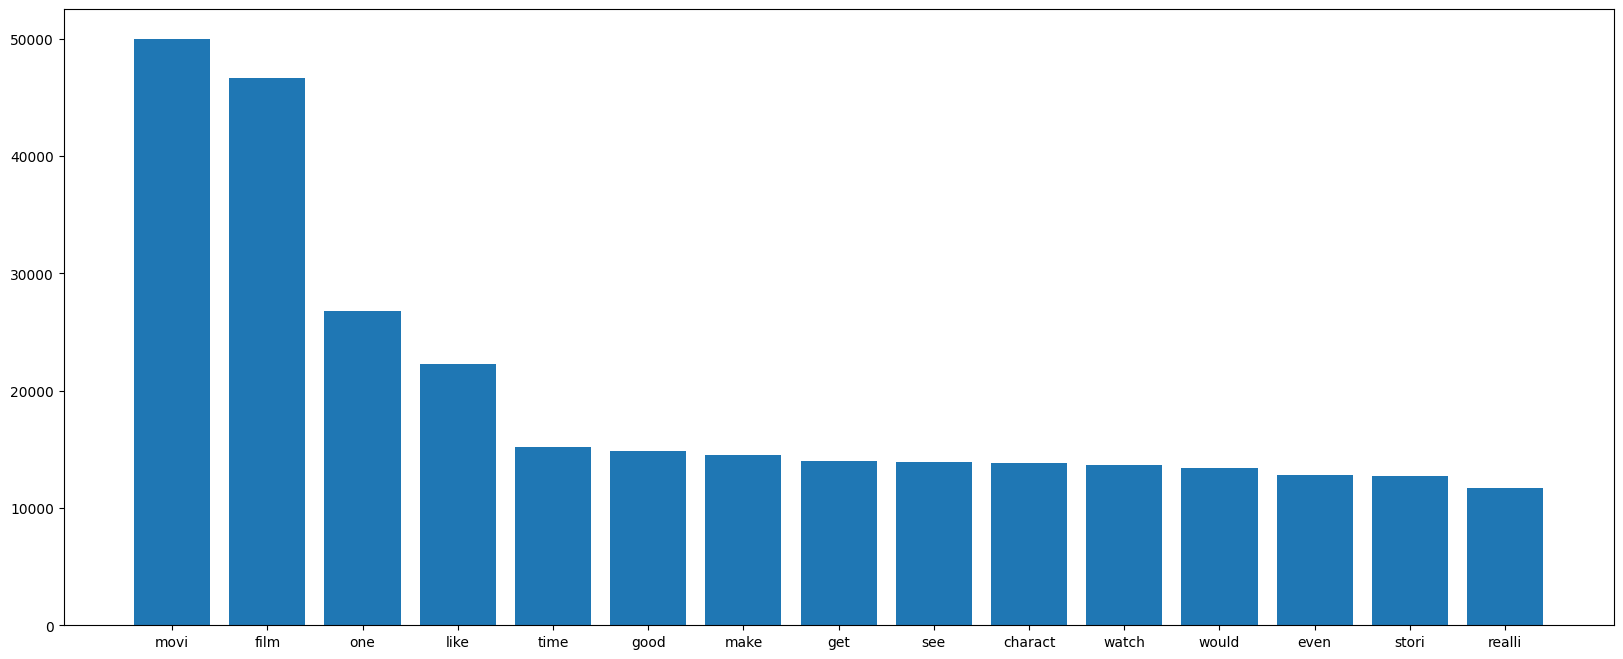

In [14]:
all_words_df = pd.DataFrame(all_words.items())
all_words_df.columns = ["word", "freq"]
all_words_df.sort_values("freq", ascending = False, ignore_index = True, inplace = True)
print(all_words_df)
x = all_words_df.head(15)["word"]
y = all_words_df.head(15)["freq"]
plt.figure(figsize = (20, 8))
plt.bar(x, y)
plt.show()

In [15]:
with open("words.txt", "w", encoding="utf-8") as words_txt:
    words_txt.writelines(line + "\n" for line in all_words_df["word"].values)